목차
- 문제의 발단
- 몬티홀 문제 정의
- 몬티홀 문제 확률 베이지언 통계로 구하기
- 몬티홀 문제 확률 파이썬으로 구하기
- 몬티홀 문제 강화학습 AI생성으로 문제 해결하기

1. 문제의 발단.
몬티홀 문제의 통계적 확률과 정의는 알지만 머리속으로는 나에게 와닿지 않는다.
이를 더 쉽게 이해하기 위해 파이썬을 통해 문제를 해결해보자.

몬티홀 문제란?
  - 하나의 상품과 두개의 꽝이 있는 세개의 문이 주어진다.
  - 참가자(player가 하나의 문을 선택한다.)
  - 사회자가 참가자가 선책하지 않은 문중에 상품이 없는 문 하나를 연다.
  - 참가자에게는 문을 바꿀지 말지의 선택의 순간이 주어진다.
  - 이때 문을 바꾸는 것이 좋을지, 처음 선택한 문을 계속 유지하는게 좋을지?

베이지언 정리를 통한 몬티홀 문제의 해결

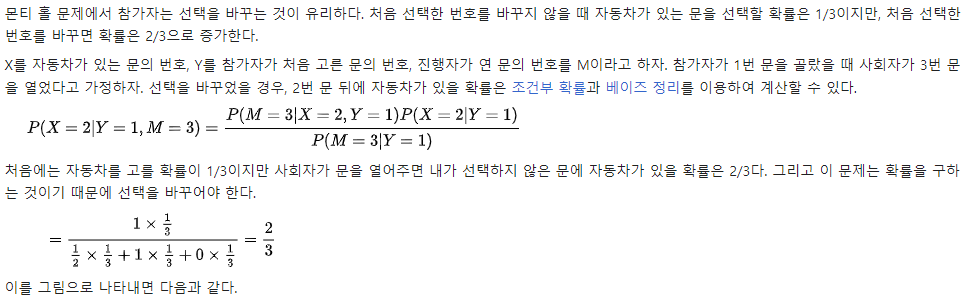

출처 : https://ko.wikipedia.org/wiki/%EB%AA%AC%ED%8B%B0_%ED%99%80_%EB%AC%B8%EC%A0%9C


In [ ]:
# 기본 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 몬티홀 파이썬
k = 1000000 # 시도 횟수

stay = 0 # 재자리에 있을 경우 상품을 고른 횟수
change = 0 # 문을 바꿀 경우 상품을 고른 횟수
#  stay 가 0일경우 문을 바꾼경우 상품 횟득

for i in range(k):
  car = np.random.randint(0,3)
  choice = np.random.randint(0,3)
  door = [0, 0, 0]
  door[car] += 1
  first_choice = door[choice]

  if ( door[0]==1 ) :
    del( door[1] )
  elif ( door[1]==1 ) :
    del( door[0] )
  else :
    random.shuffle( door )
    del( door[0] )   # [3, 5] -> [5]

  stay = stay + first_choice #Stay
  change = change + door[0] #Change

print(f"{k}번 도전")
print(f"문을 바꾸지 않은 경우의 성공확률: {stay/k}")
print(f"문을 바꾼 경우의 성공 확률: {change/k}")

1000000번 도전
문을 바꾸지 않은 경우의 성공확률: 0.333122
문을 바꾼 경우의 성공 확률: 0.777869


파이썬으로 해결해 본 결과 문을 바꾼 경우가 상품을 획득할 확률이 더 높다
내가 처음 선택한 문이 상품일 확률 = 1/3
나머지 두 문이 상품일 확률 = 2/3
두 문중하나를 제거 -> 남은 하나의 문이 상품일 확률 = 2/3이 되어 문을 바꾸는게 더 좋다!

과연 강화학습을 통해 컴퓨터를 학습시킨다면 컴퓨터는 어떻게 할까?
강화학습을 통해 몬티홀 문제를 해결 할 수 있을까?

In [1]:
# 강화학습을 통한 몬티홀 문제 해결
import numpy as np
import random

# 몬티홀 문제 정의
class MontyHallAgent:
    def __init__(self, epsilon, alpha, gamma, num_doors):
        self.epsilon = epsilon  # 탐험 확률
        self.alpha = alpha  # 학습 속도
        self.gamma = gamma  # 할인 계수
        self.num_doors = num_doors  # 문의 개수
        self.q_values = {}  # Q-Value 테이블 초기화

    def get_state_key(self, player_choice, revealed_door):
        return f"참가자가 선택한 문: {player_choice}, 사회자가 제거한 문{revealed_door}"

    def get_action(self, state):
        # 탐험 또는 이전에 학습한 Q-Value에 기반하여 행동 선택
        if random.uniform(0, 1) < self.epsilon:
            return random.choice([0, 1])  # 0: 변경하지 않음, 1: 변경
        else:
            return np.argmax(self.q_values.get(state, [0, 0]))

    def update_q_value(self, state, action, reward, next_state):
        current_q = self.q_values.get(state, [0, 0])
        max_future_q = np.max(self.q_values.get(next_state, [0, 0]))
        new_q = current_q[action] + self.alpha * (reward + self.gamma * max_future_q - current_q[action])
        current_q[action] = new_q
        self.q_values[state] = current_q

# 몬티홀문제 시작
def play_monty_hall(agent, num_episodes):
    for episode in range(num_episodes):
        # 초기 상태 설정
        player_choice = random.randint(0, 2)
        car_door = random.randint(0, 2)
        revealed_door = [door for door in range(3) if door != player_choice and door != car_door][0]

        # 플레이어 선택 변경 여부 결정
        action = agent.get_action(agent.get_state_key(player_choice, revealed_door))

        # 보상 계산
        reward = 1 if (player_choice == car_door and action == 1) or (player_choice != car_door and action == 0) else 0
        # action 0이 문을 바꾼것, action 1이 문을 바꾸지 않은 것

        # 다음 상태 키 생성
        next_state = agent.get_state_key(player_choice, revealed_door)

        # Q-Value 업데이트
        agent.update_q_value(agent.get_state_key(player_choice, revealed_door), action, reward, next_state)

# Monty Hall 에이전트 생성
agent = MontyHallAgent(epsilon=0.1, alpha=0.5, gamma=0.9, num_doors=3)

# 학습 실행
play_monty_hall(agent, num_episodes=1000000)

In [4]:
# 학습된 Q-Value 테이블 출력
print("학습된 Q-Value 테이블:")
print(agent.q_values)

학습된 Q-Value 테이블:
{'참가자가 선택한 문: 1, 사회자가 제거한 문2': [9.999999999999979, 8.999999999999979], '참가자가 선택한 문: 0, 사회자가 제거한 문1': [4.686591465634064, 4.330842493698982], '참가자가 선택한 문: 1, 사회자가 제거한 문0': [4.257718929948507, 3.741655171215588], '참가자가 선택한 문: 2, 사회자가 제거한 문1': [9.999999999999979, 8.999999999999979], '참가자가 선택한 문: 0, 사회자가 제거한 문2': [9.999999999999979, 8.999999999999979], '참가자가 선택한 문: 2, 사회자가 제거한 문0': [6.010776419860822, 5.068714229665554]}


- 0번의 위치가 문을 바꾼것, 1번의 위치가 문을 바꾸지 않은것의 보상(높을수록 좋다)
- 참가자가 선택한 문에따른 사회자가 제거한 문의 경우의 수에 따른 보상출력
- 대부분의 상황에서 문을 변경한 것이 보상이 더 좋다.

따라서 강화학습으로도 문을 변경한것이 더 좋다는 결론을 도출할 수가 있다.